【課程名稱】<font color=#FF0000>機器學習(Machine Learning, ML)</font><br>
【授課講師】[陳祥輝 (mail : HsiangHui.Chen@gmail.com)](mailto:HsiangHui.Chen@gmail.com)<br>
【facebook】[陳祥輝老師的臉書 (歡迎加好友)](https://goo.gl/osivhx)<br>
【相關課程】[東吳推廣數位資訊學苑陳祥輝老師的課程表](https://www.ext.scu.edu.tw/courses_search.php?key=陳祥輝)<br>

<a id=home>【課程大綱】</a>
1. [Cross Validation](#CrossValidation)
2. [Types of Cross Validation Techniques](#Type)
    - `Holdout` Method
    - `K-Fold` Cross Validation Method
    - `Leave-one-out` cross validation (LOOCV)
3. [Performance Measures](#PerformanceMeasures)
    - Classification Accuracy
    - Logarithmic Loss
    - `Confusion Matrix`(混淆矩陣)
        - `True Positives` : The cases in which we predicted YES and the actual output was also YES.
        - `True Negatives` : The cases in which we predicted NO and the actual output was NO.
        - `False Positives` : The cases in which we predicted YES and the actual output was NO.
        - `False Negatives` : The cases in which we predicted NO and the actual output was YES.
    - Receiver Operating Characteristic Curve (`ROC Curve`) / Area Under Curve (`AUC`)
    - `F1` Score
    - Mean Absolute Error (`MAE`)
    - Mean Squared Error (`MSE`)
4. [ROC Curve and AUC](#roc)

In [1]:
# -*- coding: utf-8 -*-
from platform import python_version
import os, time, socket, datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold, \
                                    StratifiedKFold, StratifiedShuffleSplit, ShuffleSplit, \
                                    KFold, LeaveOneOut, LeavePOut
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve
from sklearn.datasets import make_classification

from sklearn.linear_model import LogisticRegression

import sklearn
from sklearn.svm import SVC, SVR
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, \
                            classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder


print("【日期時間】{}".format(time.strftime("%Y/%m/%d %H:%M:%S")))
print("【工作目錄】{}".format(os.getcwd()))
print("【主機名稱】{} ({})".format(socket.gethostname(),socket.gethostbyname(socket.gethostname())))
print("【Python】{}".format(python_version()))
print("【sklearn】{}".format(sklearn.__version__))

【日期時間】2025/05/16 14:49:17
【工作目錄】d:\NTPU_class\ml\code
【主機名稱】MSI (10.20.70.63)
【Python】3.10.5
【sklearn】1.6.1


In [2]:
from matplotlib.font_manager import FontProperties  
winfont01 = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=12) 
winfont02 = FontProperties(fname=r"c:\windows\fonts\kaiu.ttf", size=12) 

# plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 設定字型為微軟正黑體
# plt.rcParams['axes.unicode_minus'] = False                # 解決負號顯示問題

# macfont = FontProperties(fname="/Library/Fonts/Arial Unicode.ttf", size=10) 

### <a id=CrossValidation><font color=#0000FF>1.Cross Validation</font></a> [【HOME】](#home)

- Cross validation is a technique which is used to evaluate the machine learning model by training it on the subset of the available data and then evaluating them on the remaining input data. 
- On a simple note, we keep a portion of data aside and then train the model on the remaining data. 
- And then we test and evaluate the performance of model on portion of data that was kept aside.

### <a id=Type><font color=#0000FF>2.Types of Cross Validation Techniques</font></a> [【HOME】](#home)
- Holdout Method
- K-Fold Cross Validation Method
- Leave-one-out cross validation (LOOCV)
- Leave-p-out cross validation

### <font color=#0000FF>Holdout Method</font>

<img src="https://miro.medium.com/max/1400/1*1bCutJQKJW7W_pXg611CHw.jpeg" width=400 align=left></img>

### <font color=#0000FF>K-Fold Cross Validation Method</font>

<img src="https://miro.medium.com/max/1046/1*7y8VLuY9p7E4yhYmStLHpQ.png" width=400 align=left></img>

<img src="https://i.imgur.com/tLWEE80.png" width=500 align=left></img>

##### <font color=#0000FF>Leave-one-out cross validation</font>

老師說他不喜歡用這個 因為他只用一筆 因為不是猜對就是猜錯<br>
不是0就是100 這是p 不要覺得陌生ㄏㄏ

<img src="https://miro.medium.com/max/1400/1*IAPGX_TWNAylsCfTyhBo6g.png" width=400 align=left></img>

【資料來源】<https://scikit-learn.org/stable/modules/cross_validation.html>

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width=500 align=left></img>

test一定都是在外面的喔

#### <font color=blue>sklearn.model_selection 包含很多不同的 cross validation 類別</font>

In [3]:
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold, \
                                    StratifiedKFold, StratifiedShuffleSplit, ShuffleSplit, \
                                    KFold, LeaveOneOut, LeavePOut

#### <font color='red'>cross_val_score () 參數說明 :</font>
- scoring :
    - [The scoring parameter: defining model evaluation rules](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) <font color=#FF0000>【★★★★★】所有評估績效指標，非常非常重要的官方資料</font>
- cv : int or cv相關物件(類別)
- n_jobs : 設定說明，可以調整上面的樣本數為10,000，單核心會跑得比較久
    - 預設為None，即為 1 核心
    - -1 : 使用所有核心數    

### <font color=red>先前往 [The scoring parameter: defining model evaluation rules](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) 去瞧瞧</font>

jaccard_score 推薦系統多半會用到

### <font color='blue'>【資料集】iris</font>

In [4]:
fname = r'C:\Data\PyMLData\iris.csv'
data = pd.read_csv(fname, sep=',', encoding='utf-8', engine='python')
X = data.iloc[:,:4].to_numpy()     # 官方資料建議 .values 改成 .to_numpy()
y = data.iloc[:, 4].to_numpy()
print(data.shape)
data.head()

(150, 5)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### <font color='blue'>Cross Validation : 陽春型(就是簡單的給定 k-fold 的 k )</font>

In [5]:
from sklearn.model_selection import cross_val_score

In [6]:
%%time
model = LogisticRegression()
cv = 5                                     # cv : cross validation
scores = cross_val_score(estimator=model,
                         X=X, y=y,
                         scoring="accuracy",
                         cv=cv,            # 【重點 】
                         n_jobs=-1,
                         verbose=0,
)

print(f"【scores】{cv}-fold")
print(len(scores))
print(f"【scores 平均數】")
print(f"{np.mean(scores):.3f}")
print(f"【scores 標準差】")
print(f"{np.std(scores):.3f}")

【scores】5-fold
5
【scores 平均數】
0.973
【scores 標準差】
0.025
CPU times: total: 62.5 ms
Wall time: 1.69 s


### <font color='blue'>Cross Validation : RepeatedKFold</font>

In [13]:
%%time
model = LogisticRegression()

cv = RepeatedKFold(n_splits=5,            # k-fold 的 k
                   n_repeats=30,          # 外面迴圈的次數
                   random_state=None)      # 這裡如果設定數值的話每一次都會跑一樣ㄉ 所以不能給她一樣的

scores = cross_val_score(estimator=model,
                         X=X, y=y,
                         scoring="accuracy",
                         cv=cv,            # 【重點】
                         n_jobs=-1,
                         verbose=0,
)

print(f"【scores】{cv}-fold * 30")
print(len(scores))
print(f"【scores 平均數】")
print(f"{np.mean(scores):.3f}")
print(f"【scores 標準差】")
print(f"{np.std(scores):.3f}")

【scores】RepeatedKFold(n_repeats=30, n_splits=5, random_state=None)-fold * 30
150
【scores 平均數】
0.963
【scores 標準差】
0.032
CPU times: total: 78.1 ms
Wall time: 177 ms


### <font color='blue'>Cross Validation : RepeatedStratifiedKFold</font>

主要差再分層 <BR>
這裡沒有設定表示直接用y來分層

In [11]:
%%time
model = LogisticRegression()

cv = RepeatedStratifiedKFold(n_splits=5,            # k-fold 的 k
                             n_repeats=30,          # 外面迴圈的次數
                             random_state=None)# 這裡如果設定數值的話每一次都會跑一樣ㄉ 所以不能給她一樣的     

scores = cross_val_score(estimator=model,
                         X=X, y=y,
                         scoring="accuracy",
                         cv=cv,            # 【重點】
                         n_jobs=-1,
                         verbose=0,
)

print(f"【scores】{cv}-fold * 30")
print(len(scores))
print(f"【scores 平均數】")
print(f"{np.mean(scores):.3f}")
print(f"【scores 標準差】")
print(f"{np.std(scores):.3f}")

【scores】RepeatedStratifiedKFold(n_repeats=30, n_splits=5, random_state=None)-fold * 30
150
【scores 平均數】
0.964
【scores 標準差】
0.034
CPU times: total: 78.1 ms
Wall time: 183 ms


### <font color='blue'>【資料集】蘑菇可食性與有毒性</font>

In [ ]:
fname =r'C:\Data\PyMLData\mushrooms.csv'
data = pd.read_csv(fname, sep=',', encoding='utf-8', engine='python')
X = data.values[:,1:]
y = data.values[:, 0]
print(data.shape)
data.head()

### <font color='blue'>【資料集】pima indians diabetes (皮馬印第安人糖尿病)</font>

In [5]:
fname = r'D:\NTPU_class\ml\code\PyMLData\diabetes.csv'
data = pd.read_csv(fname)
X = data.values[:,0:-1]
y = data.values[:,-1]
print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### <a id=PerformanceMeasures><font color=#0000FF>3.Performance Measures</font></a> [【HOME】](#home)
- Classification Accuracy / Precision / Sensitivity(Recall) / Specificity
- Confusion Matrix
    - `真陽性`(True Positives, TP) : The actual case is <u>YES</u> and predicted is also <u>YES</u>.
    - `真陰性`(True Negatives, TN) : The actual case is <u>NO</u> and predicted is also <u>NO</u>.
    - `偽陽性`(False Positives, FP) : The actual case is <u>NO</u> and predicted is also <u>YES</u>.
    - `偽陰性`(False Negatives, FN) : The actual case is <u>YES</u> and predicted is also <u>NO</u>.
- Receiver Operating Characteristic Curve (ROC Curve) / Area Under Curve (AUC)
- F1 Score
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)

### <font color=#0000FF>探討 Accuracy(正確性、準確性)、Precision(精確性)的差異</font>

##### <font color=#0000FF>Confusion Matrix</font>
<img src="http://180.218.162.136:2018/Images/PyML/ConfusionMatrix.png" width=250 align=left></img>

#### <font color=#0000FF>Accuracy and Precision</font>
【資料來源】<https://shannon112.blogspot.com/2019/03/roc-auc-ci-recall-f1-accuracy-precision.html>

<img src="https://4.bp.blogspot.com/-_T03ppfmWkM/XHpOKfqGkvI/AAAAAAAATA8/sIcDfxUkXGQ3Te_e0LZA4OF8FGRt9U-swCLcBGAs/s1600/NEWS_9.28.15_Targets_Fig1.jpg" width=250 align=left></img>

#### <font color=#0000FF>Bias and Variance</font>
【資料來源】<https://www.analyticsvidhya.com/blog/2021/06/how-to-get-the-most-out-of-bias-variance-tradeoff/>

<img src="https://editor.analyticsvidhya.com/uploads/22890bias-and-variance.jpg" width=250 align=left></img>

##### <font color=#0000FF>Classification Accuracy</font>

<img src="http://180.218.162.136:2018/Images/PyML/Accuracy.png" width=500 align=left></img>

##### <font color=#0000FF>Classification Precision</font>

<img src="http://180.218.162.136:2018/Images/PyML/Precision.png" width=400 align=left></img>

##### <font color=#0000FF>Sensitivity(or Recall) and Specificity</font>

<img src="http://180.218.162.136:2018/Images/PyML/SensitivityAndSpecificity.png" width=500 align=left></img>

##### <font color=#0000FF>F1 Score</font>
- Precision : It is the number of correct positive results divided by the number of positive results predicted by the classifier.
- Recall : It is the number of correct positive results divided by the number of all samples that should have been identified as positive.

<img src="http://180.218.162.136:2018/Images/PyML/F1 Score.png" width=700 align=left></img>

<img src="http://180.218.162.136:2018/Images/PyML/Fig01_混淆矩陣與評估指標.JPG" width=650 align=left></img>

#### <font color=#0000FF>兩數$x$, $y$的平均數</font>
- 算術平均A($Arithmetic\:mean$) : $\frac{x+y}{2}$
- 調和平均H($Harmonic\:mean$) : $\frac{1}{\frac{\frac{1}{x}+\frac{1}{y}}{2}}=\frac{2}{\frac{1}{x}+\frac{1}{y}}=\frac{2xy}{x+y}$
- 幾何平均G($Geometric\:mean$) : $\sqrt{xy} => H=\frac{G^2}{A}$

#### <font color=#0000FF>比較兩數$x$, $y$的算數平均數($Arithmetic\:mean$)與調和平均的變化($Harmonic\:mean$)</font>
- 算術平均 : 永遠在$x$, $y$中間
- 調和平均 : 永遠靠近$x$, $y$兩者較小的那一邊

### $F1=2*\frac{1}{\frac{1}{precision}+\frac{1}{recall}}$

#### [NOTE]$y1$數列遞增、$y2$數列遞減

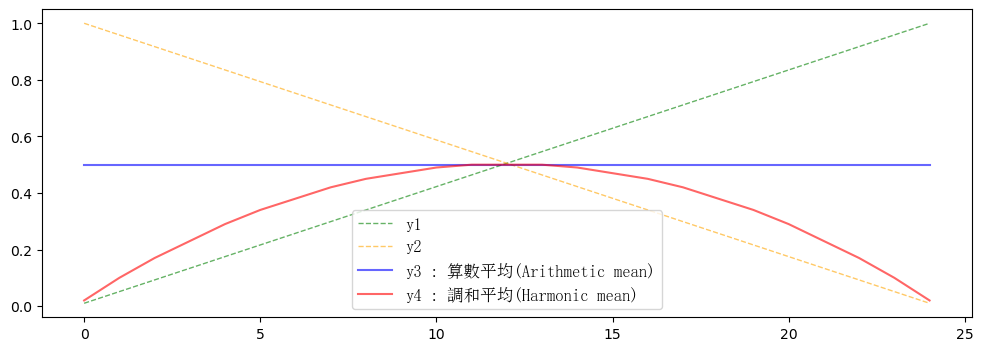

In [8]:
n = 25
y1 = np.linspace(0.01, 1, n)
y2 = np.linspace(1, 0.01, n)
y3=np.round((y1+y2)/2, 2)
y4=np.round(2*y1*y2/(y1+y2), 2)

plt.figure(figsize=[12, 4])

plt.plot(y1, label='y1', color='green', linestyle='--', linewidth=1, alpha=0.6)
plt.plot(y2, label='y2', color='orange', linestyle='--', linewidth=1, alpha=0.6)
plt.plot(y3, label='y3 : 算數平均(Arithmetic mean)', color='blue', alpha=0.6)
plt.plot(y4, label='y4 : 調和平均(Harmonic mean)', color='red', alpha=0.6)
plt.legend(prop=winfont01)

plt.show()

調和平均比較會貼近下面的部分

##### <font color=#0000FF>Mean Absolute Error (MAE)</font>

- It is the average of the difference between the original values and the predicted values. 
- It doesn’t gives us any idea of the direction of the error i.e. whether the model is under predicting or over predicting the data.

$Mean\ Absolute\ Error=\frac{1}{N}\sum_{j=1}^{N}|y_j-\hat y_j|$

##### <font color=#0000FF>Mean Squared Error (MSE)</font>

$Mean\ Squared\ Error=\frac{1}{N}\sum_{j=1}^{N}(y_j-\hat y_j)^2$

### <a id=roc><font color='blue'>ROC Curve and AUC</font></a> [【HOME】](#home)
- ROC : 接收者操作特徵曲線，或者叫ROC曲線（英語：Receiver operating characteristic curve）
- AUC : Area under Curve

<img src="http://180.218.162.136:2018/Images/PyML/多模型的ROC曲線與AUC.jpg" width=600 align=left></img>

In [10]:
from sklearn.metrics import roc_curve, auc

In [11]:
fname = r'D:\NTPU_class\ml\code\PyMLData\diabetes.csv'
data = pd.read_csv(fname)
X = data.values[:,0:-1]
y = data.values[:,-1]
print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### <font color=#0000FF>**顯示出各個指標**</font>

- accuracy_score
- recall_score
- precision_score
- f1_score

In [6]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [23]:
from sklearn.ensemble import RandomForestClassifier
model = DecisionTreeClassifier(criterion='gini',max_depth=10)      # 如果無法收斂 可以調整max_iter 
model.fit(X, y)
y_hat = model.predict(X)

scores = cross_val_score(estimator=model, cv=5, X=X, y=y, n_jobs=-1)
print(len(scores))
print(f"accuracy score : {accuracy_score(y_true=y, y_pred=y_hat):.2%}")

# zero_division : 當分母為零時該如何處理
print(f"recall score : {recall_score(y_true=y, y_pred=y_hat, pos_label=1, zero_division=0.0):.3f}")    # 為了讓他不要顯示很多可怕的warning 讓他顯示0.0就好
print(f"precision score : {precision_score(y_true=y, y_pred=y_hat, pos_label=1, zero_division=0.0):.3f}")
print(f"f1 score : {f1_score(y_true=y, y_pred=y_hat, pos_label=1, zero_division=0.0):.3f}")

5
accuracy score : 97.79%
recall score : 0.981
precision score : 0.956
f1 score : 0.969


#### <font color=#0000FF>**繪製ROC Curve and AUC**</font>

In [24]:
from sklearn.metrics import roc_curve, auc

(768, 2)
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]
--------------------------


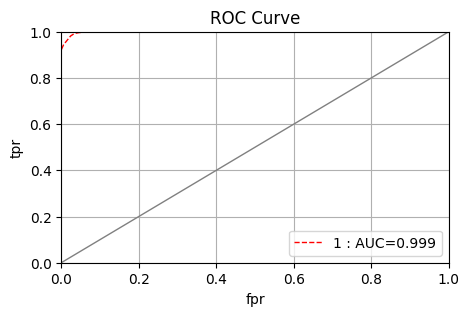

In [25]:
probs = model.predict_proba(X)    # 產生一個 (n樣本數, m類別數)
print(probs.shape)
print(probs[:5])                  # 列出前5個樣本瞧瞧
print("--------------------------")

pos_label = 1
pos_prob = probs[:, pos_label]
fpr, tpr, _ = roc_curve(y_true=y, y_score=pos_prob, pos_label=pos_label)
AUC = auc(x=fpr, y=tpr)

# 繪圖區
plt.figure(figsize=[5, 3])

plt.plot(fpr, tpr, color="red", linestyle="--", linewidth=1, label=f"{pos_label} : AUC={AUC:.3f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="-", linewidth=1)
plt.legend(loc="lower right")

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Curve")
plt.grid(True)

plt.show()